<a href="https://colab.research.google.com/github/reznimat/ppzd_sp/blob/main/semestralni_prace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Načtení knihoven

In [ ]:
import csv
import pandas as pd
import math as mt
import datetime as dt
from matplotlib import pyplot as plt
from tabulate import tabulate

print('knihovny načteny')

hotovo


# Načtení datových souborů

In [ ]:
# POZOR, pouze vzorek dat
url_sales = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/SAMPLE_Online_Sales.csv'
#url_sales = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Online_Sales.csv'
df_sales = pd.read_csv(url_sales)

url_coupons = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Discount_Coupon.csv'
df_coupons = pd.read_csv(url_coupons,sep=";")

url_tax = 'https://raw.githubusercontent.com/reznimat/ppzd_sp/main/Tax_amount.csv' #původní GST ve formátu 10% ručně upraveno na GST_pct ve formátu 10 (18 položek)
df_tax = pd.read_csv(url_tax,sep=";")

print('datové soubory načteny')

hotovo


# Číselníky

In [ ]:
# Čísleník měsíců
c_months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

# Čísleník produktových kategorií
c_product_category = set()
for i, row in df_sales.iterrows():
  c_product_category.add(row["Product_Category"])

#print(c_product_category)  # vypíše seznam produktových kategorií
#print(c_months)

print('číselníky vytvořeny')

hotovo


# Definice funkcí

In [ ]:
# funkce pro výpočet sales_amount po slevě na úrovni item
# není zohledněna doprava (předpoklad, že ta je relevantní pro úroveň transaction)
def Revenue(row):
    if row["Coupon_Status"] == 'Not Used':
      return (row["Quantity"]*row["Avg_Price"]) #*(1+(row["GST_pct"]/100))
    else:
      return (row["Quantity"]*row["Avg_Price"])*(1-(row["Discount_pct"]/100)) #*(1+(row["GST_pct"]/100))

# Převod Transaction_Date ve formátu m/d/Y (1/20/2019) na month abrevation (Jan)
def MonthAbrv(row):
    return pd.to_datetime(row.Transaction_Date,format='%m/%d/%Y').strftime("%b")

print('funkce definovány')

hotovo


# Calculate revenue for each transaction and item level

 - Hint:
  - InvoiceValue = (( QuantityAvg_price)(1-Dicount_pct)*(1+GST))+Delivery_Charges
  - Revenue = (Quantity Avg_price)*(1-Dicount_pct)


## Obohacení df_sales o atribut Month (Date Abrv)

In [ ]:
df_sales['Month'] = df_sales.apply(MonthAbrv, axis=1)

print('v df_sales je nyní sloupec Month')

hotovo


## Spojení df_sales s df_coupons

In [ ]:
#Merge Sales a Coupons na základě Product_Category a Month
df_sales = pd.merge(df_sales,df_coupons, on=["Product_Category","Month"])

#Merge Sales a Tax na základe Product_Category
df_sales = pd.merge(df_sales,df_tax, on=["Product_Category"])

print('do df_sales byly připojeny data z df_coupons')

hotovo


## Obohacení df_sales o Revenue

In [ ]:
# nejsou započítány náklady na dopravu a daně
df_sales["Revenue"] = df_sales.apply(Revenue,axis = 1)

print(df_sales.to_markdown())
print('df_sales bylo obohaceno o sloupec Revenue')

|    |   CustomerID |   Transaction_ID | Transaction_Date   | Product_SKU    | Product_Description                                    | Product_Category   |   Quantity |   Avg_Price |   Delivery_Charges | Coupon_Status   | Month   | Coupon_Code_x   |   Discount_pct_x |   GST_pct_x |   Revenue | Coupon_Code_y   |   Discount_pct_y |   GST_pct_y | Coupon_Code   |   Discount_pct |   GST_pct |
|---:|-------------:|-----------------:|:-------------------|:---------------|:-------------------------------------------------------|:-------------------|-----------:|------------:|-------------------:|:----------------|:--------|:----------------|-----------------:|------------:|----------:|:----------------|-----------------:|------------:|:--------------|---------------:|----------:|
|  0 |        17850 |            16679 | 1/1/2019           | GGOENEBJ079499 | Nest Learning Thermostat 3rd Gen-USA - Stainless Steel | Nest-USA           |          1 |      153.71 |               6.5  | Used       

## Revenue per transaction


In [ ]:
df = df_sales[["Transaction_ID","Transaction_Date","Month","Revenue"]]

df2 = df.groupby(by=["Transaction_ID","Transaction_Date","Month"]).sum(["Revenue"])

print(df2.to_markdown())

|                            |   Revenue |
|:---------------------------|----------:|
| (16679, '1/1/2019', 'Jan') |   138.339 |
| (16680, '1/1/2019', 'Jan') |   138.339 |
| (16681, '1/1/2019', 'Jan') |     1.845 |
| (16682, '1/1/2019', 'Jan') |   634.916 |
| (16684, '1/1/2019', 'Jan') |   294.336 |
| (16685, '1/1/2019', 'Jan') |    35.956 |
| (16687, '1/1/2019', 'Jan') |    26.196 |
| (16688, '1/1/2019', 'Jan') |   110.493 |
| (16689, '1/1/2019', 'Jan') |   138.339 |
| (16692, '1/1/2019', 'Jan') |   209.223 |


## Tržby po kategoriích a měsících

In [ ]:
Month_Category_Sales = df_sales[["Transaction_Date","Month","Product_Category","Revenue"]]

print(Month_Category_Sales.to_markdown())

|    | Transaction_Date   | Month   | Product_Category   |   Revenue |
|---:|:-------------------|:--------|:-------------------|----------:|
|  0 | 1/1/2019           | Jan     | Nest-USA           |   138.339 |
|  1 | 1/1/2019           | Jan     | Nest-USA           |   138.339 |
|  2 | 1/1/2019           | Jan     | Nest-USA           |   220.986 |
|  3 | 1/1/2019           | Jan     | Nest-USA           |    73.35  |
|  4 | 1/1/2019           | Jan     | Nest-USA           |   110.493 |
|  5 | 1/1/2019           | Jan     | Nest-USA           |   138.339 |
|  6 | 1/1/2019           | Jan     | Office             |     1.845 |
|  7 | 1/1/2019           | Jan     | Office             |    45.864 |
|  8 | 1/1/2019           | Jan     | Office             |    55.521 |
|  9 | 1/1/2019           | Jan     | Office             |    55.521 |
| 10 | 1/1/2019           | Jan     | Office             |     2.754 |
| 11 | 1/1/2019           | Jan     | Office             |     2.58  |
| 12 |

### Pokus o graf - groupby ale udělal z měsíců indexy a řadí je teď podle abecedy

        RowTotal
Month           
Apr    80949.670
Aug    44199.104
Dec    36533.925
Feb    31479.736
Jan    35093.928
Jul    59711.047
Jun    33868.464
Mar    44846.421
May    49009.162
Nov    15374.506
Oct    19861.988
Sep    41633.391


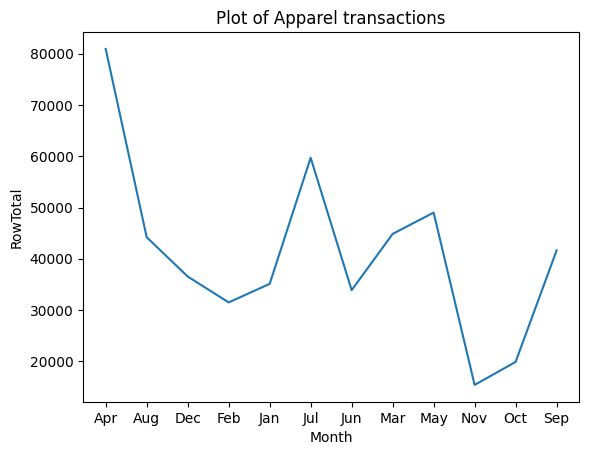

In [ ]:
df=Month_Category_Sales

# Specify categories to plot
categories_to_plot = ['Apparel']

# Filter data for desired categories
filtered_data = df[df['Product_Category'].isin(categories_to_plot)]

plot_input=filtered_data.groupby('Month').sum('Revenue')
#plot_input['month_datetime'] = pd.to_datetime(plot_input.index)

print(plot_input)

#plot_input = plot_input.set_index('month_datetime')
#plot_input = plot_input.sort_index()



# Create your plot (replace with your desired plot type)

plt.plot(plot_input.index, plot_input["Revenue"])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Plot of Apparel transactions')
plt.show()

### Funkční (ale nekonečný) výpočet měsíčních prodejů po kategoriích

In [ ]:
work_list = []

for mesic in c_months:
  for kategorie in c_product_category:
    CategoryRevenue = 0
    for i, row in df_sales.iterrows():
      if row.Product_Category == kategorie and row.Month == mesic:
        CategoryRevenue += row.Revenue
    work_list.append((kategorie, mesic, CategoryRevenue)) # append vypočítaný záznam do listu
#    print()
#    slovnik["kategorie"] = kategorie
#    slovnik["mesic"] = mesic
#    slovnik["Sales"] = CategorySales

df_CatMonSales = pd.DataFrame.from_records(work_list, columns=['kategorie', 'mesic','CategoryRevenue']) # převod listu na data_frame

print(df_CatMonSales.to_markdown())

|    | kategorie   | mesic   |   CategoryRevenue |
|---:|:------------|:--------|------------------:|
|  0 | Drinkware   | Jan     |           441.868 |
|  1 | Bags        | Jan     |            84.375 |
|  2 | Nest-USA    | Jan     |           819.846 |
|  3 | Apparel     | Jan     |           191.771 |
|  4 | Lifestyle   | Jan     |             8.343 |
|  5 | Office      | Jan     |           181.779 |
|  6 | Drinkware   | Feb     |             0     |
|  7 | Bags        | Feb     |             0     |
|  8 | Nest-USA    | Feb     |             0     |
|  9 | Apparel     | Feb     |             0     |
| 10 | Lifestyle   | Feb     |             0     |
| 11 | Office      | Feb     |             0     |
| 12 | Drinkware   | Mar     |             0     |
| 13 | Bags        | Mar     |             0     |
| 14 | Nest-USA    | Mar     |             0     |
| 15 | Apparel     | Mar     |             0     |
| 16 | Lifestyle   | Mar     |             0     |
| 17 | Office      | Mar     | 

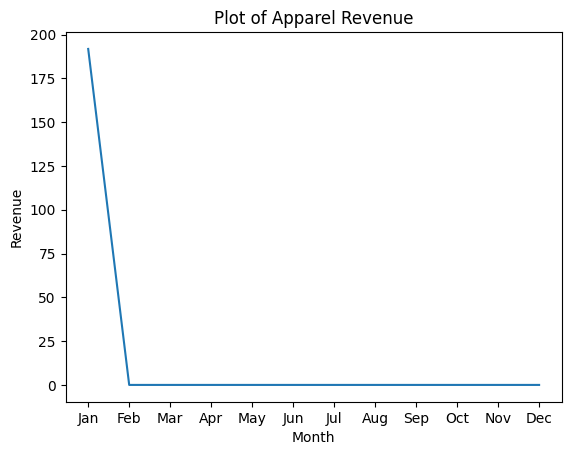

In [ ]:
# Specify categories to plot
categories_to_plot = ['Apparel']

# Filter data for desired categories
filtered_data = df_CatMonSales[df_CatMonSales['kategorie'].isin(categories_to_plot)]

# Create plot (replace with your desired plot type)
plt.plot(filtered_data["mesic"], filtered_data["CategoryRevenue"])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Plot of Apparel Revenue')
plt.show()